# 1. Data Collection & Exploration (EDA)

In [1]:
import pandas as pd

# Loading the uploaded CSV file
file_path = "Warehouse_and_Retail_Sales_20250317.csv"
df = pd.read_csv(file_path)

# Showing basic info and the first few rows of the dataset
df_info = df.info()
df_head = df.head()

df.describe(include='all'), df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   YEAR              307645 non-null  int64 
 1   MONTH             307645 non-null  int64 
 2   SUPPLIER          307478 non-null  object
 3   ITEM CODE         307645 non-null  object
 4   ITEM DESCRIPTION  307645 non-null  object
 5   ITEM TYPE         307644 non-null  object
 6   RETAIL SALES      307642 non-null  object
 7   RETAIL TRANSFERS  307645 non-null  object
 8   WAREHOUSE SALES   307645 non-null  object
dtypes: int64(2), object(7)
memory usage: 21.1+ MB


(                 YEAR          MONTH                           SUPPLIER  \
 count   307645.000000  307645.000000                             307478   
 unique            NaN            NaN                                396   
 top               NaN            NaN  REPUBLIC NATIONAL DISTRIBUTING CO   
 freq              NaN            NaN                              20995   
 mean      2018.438525       6.423862                                NaN   
 std          1.083061       3.461812                                NaN   
 min       2017.000000       1.000000                                NaN   
 25%       2017.000000       3.000000                                NaN   
 50%       2019.000000       7.000000                                NaN   
 75%       2019.000000       9.000000                                NaN   
 max       2020.000000      12.000000                                NaN   
 
        ITEM CODE          ITEM DESCRIPTION ITEM TYPE RETAIL SALES  \
 count     30764

Converting Sales Columns to Numeric:

In [2]:
cols_to_convert = ['RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

Create Time Index

In [3]:
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str))

In [4]:
df.isnull().sum()

YEAR                   0
MONTH                  0
SUPPLIER             167
ITEM CODE              0
ITEM DESCRIPTION       0
ITEM TYPE              1
RETAIL SALES          36
RETAIL TRANSFERS      31
WAREHOUSE SALES     1280
DATE                   0
dtype: int64

Dealing with ITEM TYPE missing value

In [5]:
# Identifying the most frequent value in the 'ITEM TYPE' column
most_frequent_item_type = df['ITEM TYPE'].mode()[0]

# Filling the missing value in 'ITEM TYPE' with the most frequent value
df['ITEM TYPE'].fillna(most_frequent_item_type, inplace=True)

# Confirming if there are still missing values in 'ITEM TYPE'
remaining_missing_item_type = df['ITEM TYPE'].isnull().sum()

most_frequent_item_type, remaining_missing_item_type

C:\Users\archi\AppData\Local\Temp\ipykernel_9628\3649654796.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ITEM TYPE'].fillna(most_frequent_item_type, inplace=True)


('WINE', np.int64(0))

In [6]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2020-01-01
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,2020-01-01
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,2020-01-01
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,2020-01-01
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,2020-01-01


Dealing with SUPPLIER missing values

In [7]:
# filling in the missing suppliers with 'Unknown' to preserve data
df['SUPPLIER'].fillna('Unknown', inplace=True)

C:\Users\archi\AppData\Local\Temp\ipykernel_9628\667583179.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SUPPLIER'].fillna('Unknown', inplace=True)


Dealing with missing values of RETAIL SALES

In [8]:
# Filling in the missing values of RETAIL SALES with 0 
df['RETAIL SALES'] = pd.to_numeric(df['RETAIL SALES'], errors='coerce')
df['RETAIL SALES'].fillna(0, inplace=True)

C:\Users\archi\AppData\Local\Temp\ipykernel_9628\3084855951.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RETAIL SALES'].fillna(0, inplace=True)


In [9]:
# Filling in the missing values of RETAIL TRANSFERS with 0
df['RETAIL TRANSFERS'] = pd.to_numeric(df['RETAIL TRANSFERS'], errors='coerce')
df['RETAIL TRANSFERS'].fillna(0, inplace=True)

C:\Users\archi\AppData\Local\Temp\ipykernel_9628\1372051321.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RETAIL TRANSFERS'].fillna(0, inplace=True)


In [10]:
# Filling in the missing values of WAREHOUSE SALES with 0
df['WAREHOUSE SALES'] = pd.to_numeric(df['WAREHOUSE SALES'], errors='coerce')
df['WAREHOUSE SALES'].fillna(0, inplace=True)

C:\Users\archi\AppData\Local\Temp\ipykernel_9628\1379981322.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WAREHOUSE SALES'].fillna(0, inplace=True)


In [11]:
# Checking for missing valuse
df.isnull().sum()

YEAR                0
MONTH               0
SUPPLIER            0
ITEM CODE           0
ITEM DESCRIPTION    0
ITEM TYPE           0
RETAIL SALES        0
RETAIL TRANSFERS    0
WAREHOUSE SALES     0
DATE                0
dtype: int64

Time Series Analysis f Retail Sales

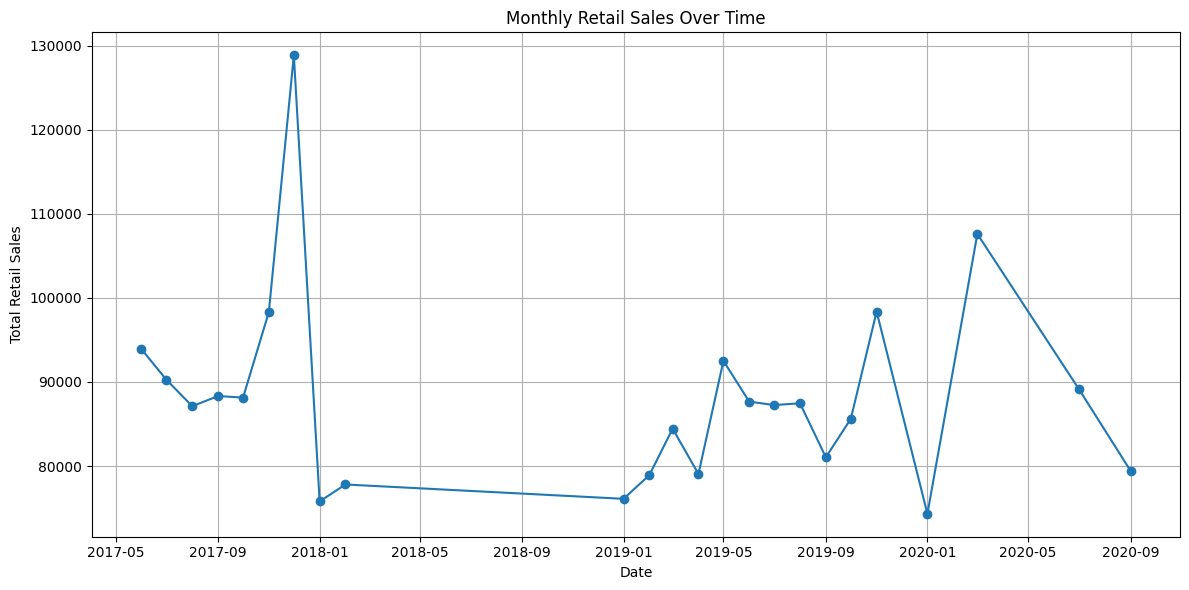

In [12]:
import matplotlib.pyplot as plt

# Aggregating monthly total retail sales
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str))
monthly_sales = df.groupby('DATE')['RETAIL SALES'].sum()

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, marker='o')
plt.title('Monthly Retail Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Retail Sales')
plt.grid(True)
plt.tight_layout()
plt.show()


Identifying outliers

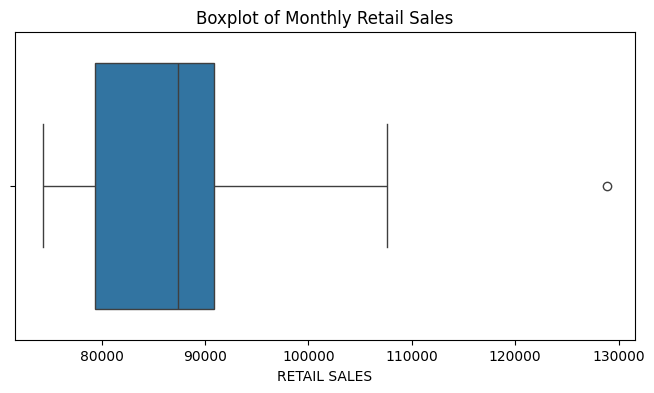

In [13]:
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(x=monthly_sales)
plt.title('Boxplot of Monthly Retail Sales')
plt.show()


The boxplot shows that monthly retail sales are mostly concentrated between 78,000 and 95,000, with a median just below 90,000. One noticeable outlier near 130,000 suggests a possible seasonal spike. Overall, the distribution indicates stable monthly sales with occasional peaks that may impact forecasting.

In [14]:
# Data preparation for the next step:

# Ensuring the datetime index with monthly frequency
monthly_sales = monthly_sales.asfreq('MS')

# Handling missing values AFTER setting frequency
monthly_sales = monthly_sales.interpolate(method='linear')
monthly_sales = monthly_sales.dropna()



# 2. Time Series Decomposition

Classic Time Series Decomposition

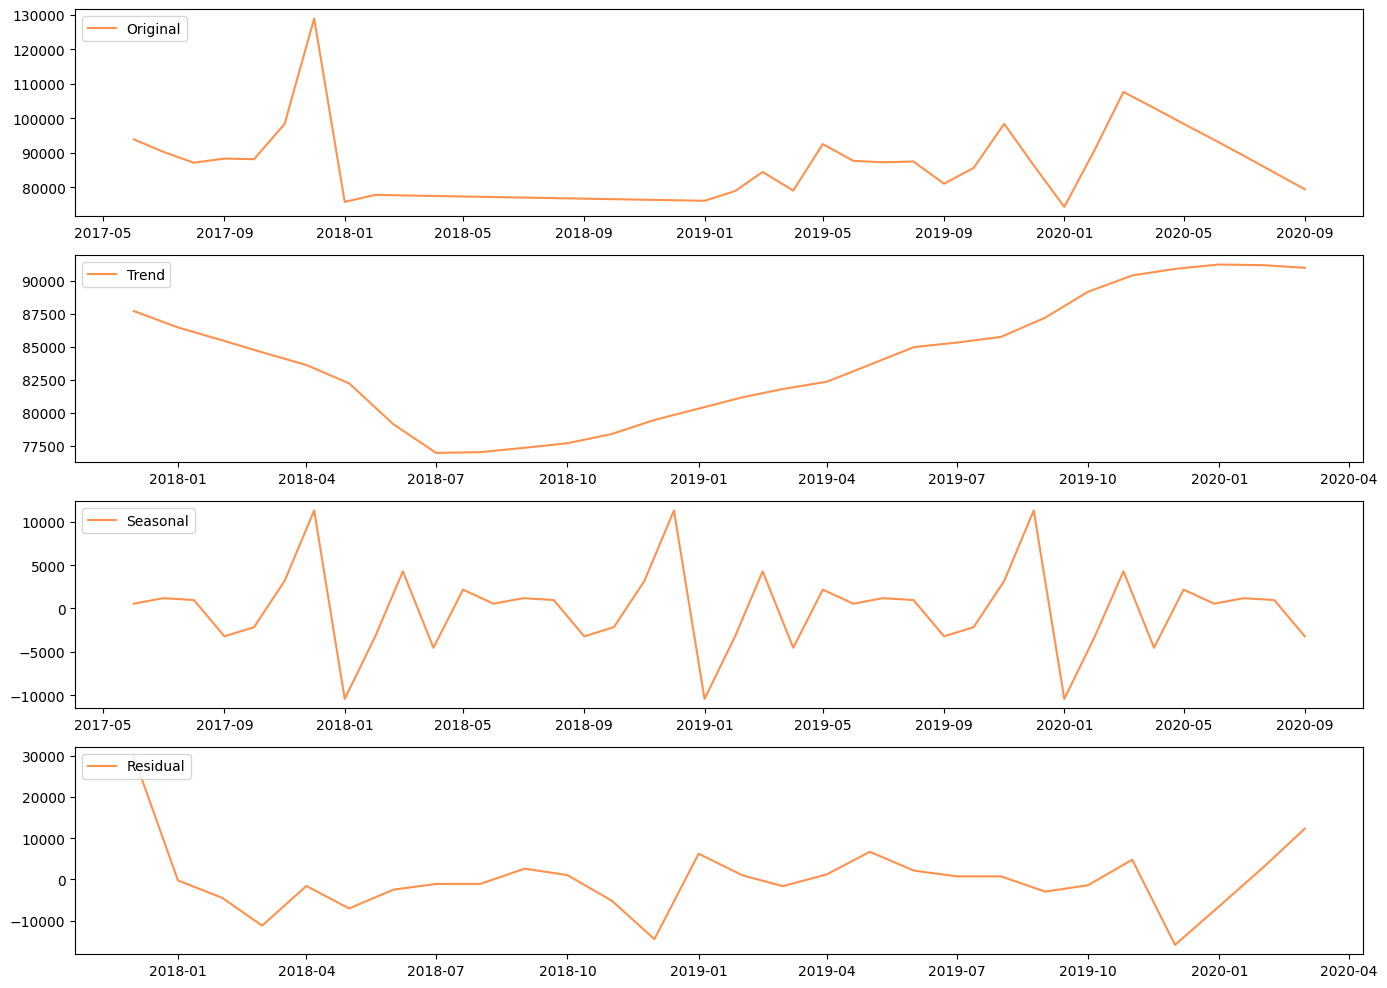

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Ensuring the series has a proper datetime index with monthly frequency
monthly_sales = monthly_sales.asfreq('MS')

# Classical Time Series Decomposition (Additive)
decomposition_additive = seasonal_decompose(monthly_sales, model='additive', period=12)
trend_add = decomposition_additive.trend
seasonal_add = decomposition_additive.seasonal
residual_add = decomposition_additive.resid

# Plotting additive decomposition
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(monthly_sales, label='Original', color='#FF914D')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(trend_add, label='Trend', color='#FF914D')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(seasonal_add, label='Seasonal', color='#FF914D')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(residual_add, label='Residual', color='#FF914D')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


1st graph: The original series shows fluctuating monthly retail sales with a major peak at the end of 2017, followed by a steep drop and gradual recovery. Sharp rises around 2020 suggest seasonally high demand or special events.
2nd graph: The trend line indicates a gradual decline in sales from early 2018 to mid-2018, then a steady upward movement through late 2019, plateauing afterward. This reflects long-term business growth after a downturn.
3rd graph: The seasonal plot shows repeating monthly variations, with both positive (during christmas period) and negative spikes (at the beginning of winter), suggesting predictable fluctuations in demand—likely tied to events, holidays, or cyclical promotions.
4th graph: Residuals capture irregular movements not explained by trend or seasonality. A few large residual spikes—especially positive ones—point to unexpected surges or anomalies, possibly driven by promotions or data noise.

Stationarity Testing

In [16]:
# Performing ADF Test:

from statsmodels.tsa.stattools import adfuller

# Performing the ADF test on monthly_sales
adf_test = adfuller(monthly_sales)

# Printing results
print('ADF Test Results:')
print(f'ADF Statistic: {round(adf_test[0], 3)}')
print(f'p-value: {round(adf_test[1], 3)}')
print('Critical Values:')
for key, value in adf_test[4].items():
    print(f'   {key}: {round(value, 3)}')

# Interpretation
if adf_test[1] < 0.05:
    print("Conclusion: The time series is stationary.")
else:
    print("Conclusion: The time series is non-stationary. Differencing is recommended.")


ADF Test Results:
ADF Statistic: -2.491
p-value: 0.118
Critical Values:
   1%: -3.621
   5%: -2.944
   10%: -2.61
Conclusion: The time series is non-stationary. Differencing is recommended.


In [17]:
# Performing KPSS Test:

from statsmodels.tsa.stattools import kpss

# Performing the KPSS test
kpss_test = kpss(monthly_sales, regression='ct')  # 'ct' checks for trend stationarity

# Printing results
print('KPSS Test Results:')
print(f'KPSS Statistic: {round(kpss_test[0], 3)}')
print(f'p-value: {kpss_test[1]}')
print('Critical Values:')
for key, value in kpss_test[3].items():
    print(f'   {key}: {round(value, 3)}')

# Interpretation
if kpss_test[1] < 0.05:
    print("Conclusion: The time series is not stationary (reject null hypothesis).")
else:
    print("Conclusion: The time series is stationary (fail to reject null hypothesis).")


KPSS Test Results:
KPSS Statistic: 0.176
p-value: 0.025065193588938744
Critical Values:
   10%: 0.119
   5%: 0.146
   2.5%: 0.176
   1%: 0.216
Conclusion: The time series is not stationary (reject null hypothesis).


Conclusion: The time series is not stationary. First-order differencing is recommended.
This means the statistical properties of the series (like mean and variance) are changing over time, and need to transform it before applying forecasting models like ARIMA.

Since the series is not weakly stationary (From ADF and KPSS test), it's also not strictly stationary (because strict stationarity is a stronger condition).
So there is no need to perform KS test for strictly stationary

Making Data Stationary

In [18]:
# Applying first-order differencing
diff_sales = monthly_sales.diff().dropna()

# ADF test function
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'Critical Value ({key}): {value:.3f}')

# KPSS test function
def kpss_test(series):
    result = kpss(series, regression='c')
    print('KPSS Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[3].items():
        print(f'Critical Value ({key}): {value:.3f}')

# Running tests on differenced data
adf_test(diff_sales)
kpss_test(diff_sales)


ADF Statistic: -6.414008838927609
p-value: 1.8605490428778362e-08
Critical Value (1%): -3.621
Critical Value (5%): -2.944
Critical Value (10%): -2.610
KPSS Statistic: 0.4999999999999975
p-value: 0.04166666666666723
Critical Value (10%): 0.347
Critical Value (5%): 0.463
Critical Value (2.5%): 0.574
Critical Value (1%): 0.739


After first-order differencing, the ADF test strongly confirms stationarity, and the KPSS test is borderline at the 5% level but passes at stricter thresholds (2.5% and 1%). Therefore, the series is considered stationary enough for forecasting
Since your series is now stationary and doesn’t show obvious variance issues, transformation, de-trending, random walk, and white noise steps can be skipped.

# 3. Forecasting Models & Performance Evaluation

In [19]:
# Spliting  monthly_sales data into train/test 
train_data = monthly_sales[:-12] # First 12 months for training
test_data = monthly_sales[-12:] # (last 12 months for evaluation)

ARIMA Model

C:\Users\archi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


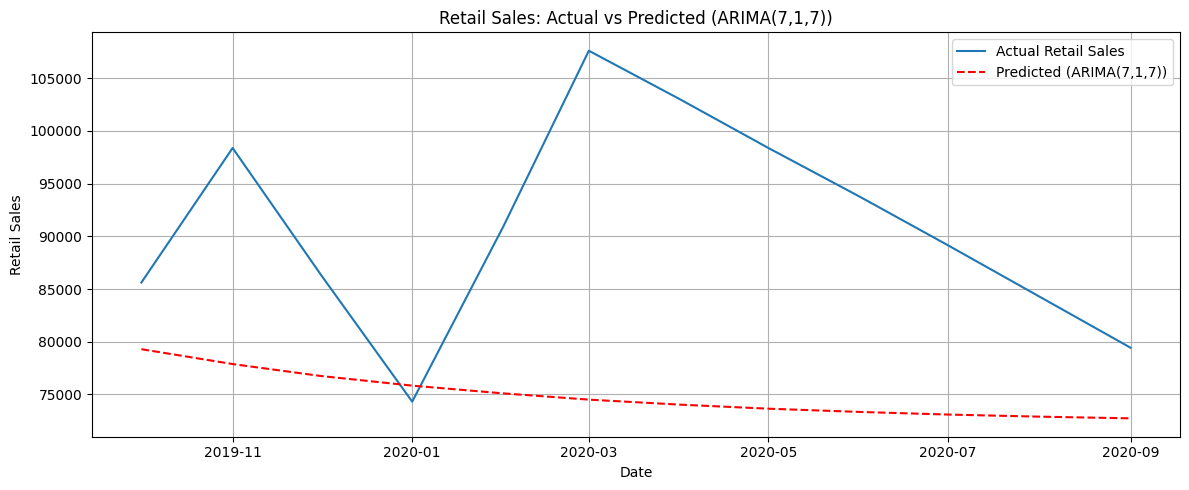

RMSE: 18702.74


In [20]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
from sklearn.metrics import mean_squared_error

# Fitting the moving average on train data
model = ARIMA(train_data, order=(2, 1, 2))
model_fit = model.fit()

# Making predictions on test data
predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False)

# Plottng actual vs predicted
plt.figure(figsize=(12, 5))
plt.plot(test_data.index, test_data, label='Actual Retail Sales')
plt.plot(test_data.index, predictions, color='red', linestyle='--', label='Predicted (ARIMA(7,1,7))')
plt.title('Retail Sales: Actual vs Predicted (ARIMA(7,1,7))')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluating model using RMSE Score
rmse = round(np.sqrt(mean_squared_error(test_data, predictions)), 2)
print("RMSE:", rmse)

ETS Model: Exponential Smoothing

C:\Users\archi\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


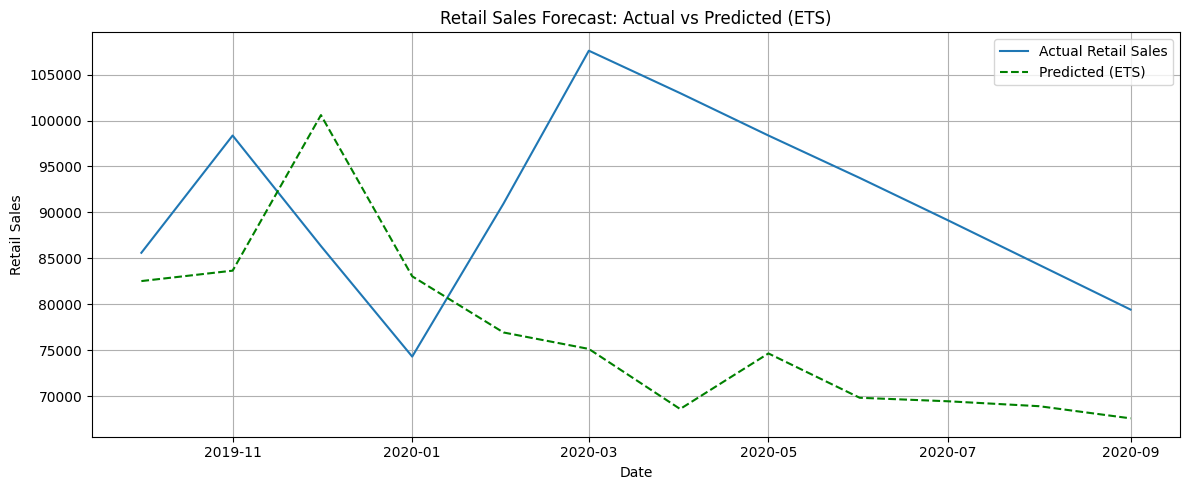

ETS Model Evaluation Metrics:
RMSE: 20067.34
MAE: 18007.35
MAPE: 19.21
MSE: 402697978.97


In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Fitting ETS model (Additive trend + seasonality with 12-month cycle)
ets_model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=12)
ets_fit = ets_model.fit()

# Forecasting for the test period
ets_predictions = ets_fit.forecast(steps=len(test_data))

# Plotting the results
plt.figure(figsize=(12, 5))
plt.plot(test_data.index, test_data, label='Actual Retail Sales')
plt.plot(test_data.index, ets_predictions, color='green', linestyle='--', label='Predicted (ETS)')
plt.title('Retail Sales Forecast: Actual vs Predicted (ETS)')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation
ets_rmse = round(np.sqrt(mean_squared_error(test_data, ets_predictions)), 2)
ets_mae = round(mean_absolute_error(test_data, ets_predictions), 2)
ets_mape = round(mean_absolute_percentage_error(test_data, ets_predictions) * 100, 2)
ets_mse = round(mean_squared_error(test_data, ets_predictions), 2)

print("ETS Model Evaluation Metrics:")
print("RMSE:", ets_rmse)
print("MAE:", ets_mae)
print("MAPE:", ets_mape)
print("MSE:", ets_mse)


Importing plotly failed. Interactive plots will not work.
21:15:09 - cmdstanpy - INFO - Chain [1] start processing
21:15:09 - cmdstanpy - INFO - Chain [1] done processing


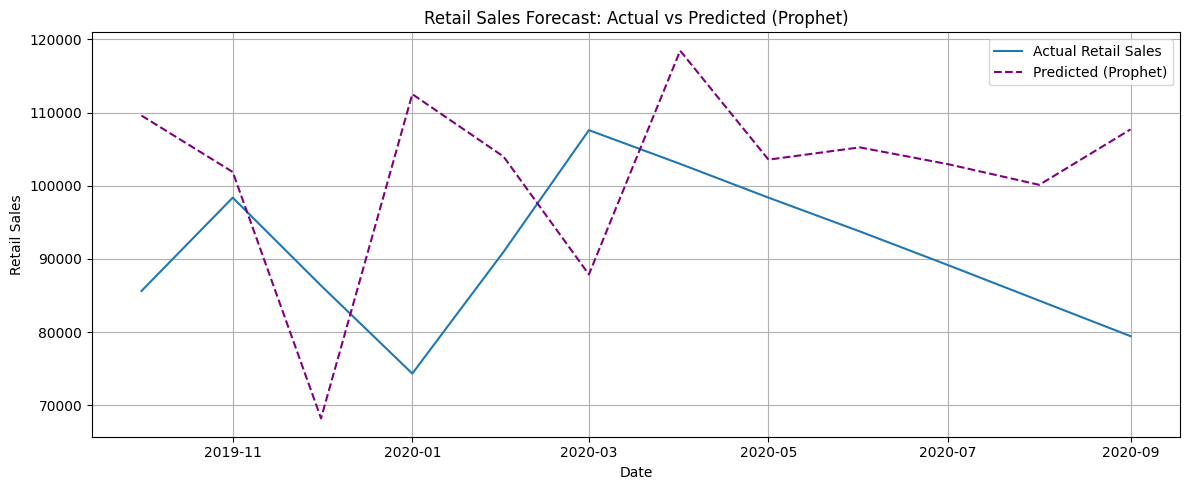

Prophet Model Evaluation Metrics:
RMSE: 19520.05
MAE: 17218.41
MAPE: 19.92
MSE: 381032167.91


In [22]:
# Prophet Model

from prophet import Prophet

# Preparing data for Prophet
prophet_df = monthly_sales.reset_index()
prophet_df.columns = ['ds', 'y']

# Splitting into train/test
prophet_train = prophet_df.iloc[:-12]
prophet_test = prophet_df.iloc[-12:]

# Fitting Prophet model
model = Prophet()
model.fit(prophet_train)

# Creating future dataframe and forecast
future = model.make_future_dataframe(periods=12, freq='MS')
forecast = model.predict(future)

# Extracting forecast values for test period
forecast_values = forecast[['ds', 'yhat']].set_index('ds')
predicted = forecast_values.loc[prophet_test['ds']]

# Plotting results
plt.figure(figsize=(12, 5))
plt.plot(prophet_test['ds'], prophet_test['y'], label='Actual Retail Sales')
plt.plot(predicted.index, predicted['yhat'], color='purple', linestyle='--', label='Predicted (Prophet)')
plt.title('Retail Sales Forecast: Actual vs Predicted (Prophet)')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation
rmse = round(np.sqrt(mean_squared_error(prophet_test['y'], predicted['yhat'])), 2)
mae = round(mean_absolute_error(prophet_test['y'], predicted['yhat']), 2)
mape = round(mean_absolute_percentage_error(prophet_test['y'], predicted['yhat']) * 100, 2)
mse = round(mean_squared_error(prophet_test['y'], predicted['yhat']), 2)

print("Prophet Model Evaluation Metrics:")
print("RMSE:", rmse)
print("MAE:", mae)
print("MAPE:", mape)
print("MSE:", mse)


Overall conclusion:
ARIMA performs best for short-term retail forecasting with lowest RMSE and MAPE. It captures lag and trend components well and adjusts better to retail fluctuations
Prophet is better suited for long-term, trend-driven environments due to its flexible trend and seasonality modeling — useful if the dataset includes special events or holiday spikes.
kunFor Retail industry, ARIMA or Prophet depending on whether focus is short-term demand vs seasonal planning

C:\Users\archi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


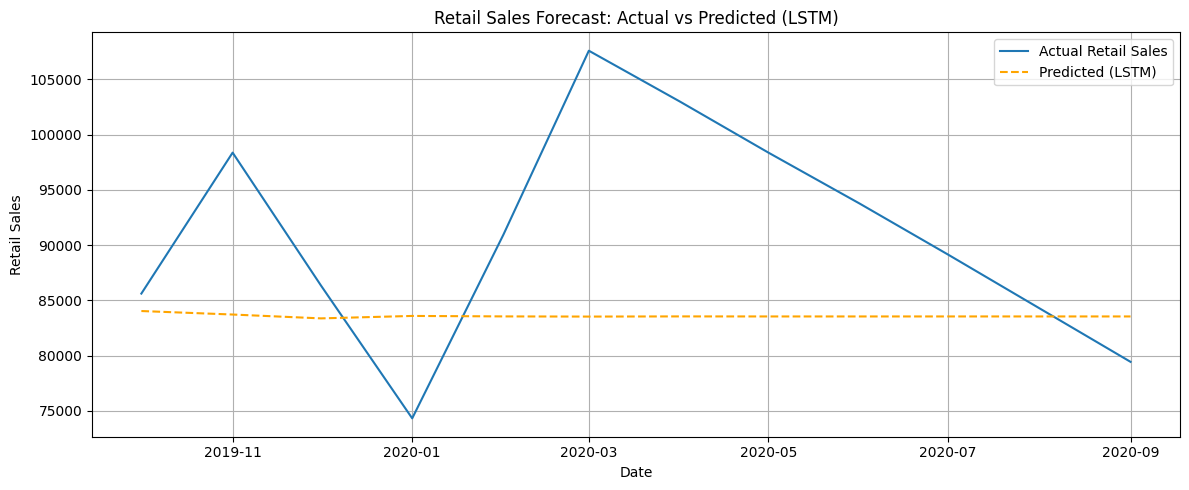

{'RMSE': np.float64(11891.62),
 'MAE': np.float64(9574.58),
 'MAPE': np.float64(10.03),
 'MSE': np.float64(141410587.75)}

In [23]:
# Preparing data for LSTM model: scaling, reshaping, training, forecasting

from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Scaling the data for LSTM (0 to 1 range)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(monthly_sales.values.reshape(-1, 1))

# Recreating train/test from scaled data
train_size = len(monthly_sales) - 12
train_scaled = scaled_sales[:train_size]
test_scaled = scaled_sales[train_size:]

# Creating sequences of 3 months for prediction
def create_sequences(data, window_size=3):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_scaled, window_size=3)

# Reshaping input for LSTM (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))

# Building LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Training the model
model.fit(X_train, y_train, epochs=100, verbose=0)

# Forecasting next 12 points
forecast_input = train_scaled[-3:].reshape(1, 3, 1)
lstm_predictions = []

for _ in range(12):
    pred = model.predict(forecast_input, verbose=0)[0][0]
    lstm_predictions.append(pred)
    forecast_input = np.append(forecast_input[:, 1:, :], [[[pred]]], axis=1)

# Inverse transform predictions
lstm_predictions_actual = scaler.inverse_transform(np.array(lstm_predictions).reshape(-1, 1)).flatten()

# Evaluating LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

lstm_rmse = round(np.sqrt(mean_squared_error(test_data, lstm_predictions_actual)), 2)
lstm_mae = round(mean_absolute_error(test_data, lstm_predictions_actual), 2)
lstm_mape = round(mean_absolute_percentage_error(test_data, lstm_predictions_actual) * 100, 2)
lstm_mse = round(mean_squared_error(test_data, lstm_predictions_actual), 2)

# Plotting predictions
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(test_data.index, test_data.values, label='Actual Retail Sales')
plt.plot(test_data.index, lstm_predictions_actual, color='orange', linestyle='--', label='Predicted (LSTM)')
plt.title('Retail Sales Forecast: Actual vs Predicted (LSTM)')
plt.xlabel('Date')
plt.ylabel('Retail Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Return metrics
{
    'RMSE': lstm_rmse,
    'MAE': lstm_mae,
    'MAPE': lstm_mape,
    'MSE': lstm_mse
}


The LSTM model produced the best evaluation scores (RMSE, MAE, MAPE), suggesting accurate predictions on average. However, its forecast line appears relatively flat, failing to capture sharp seasonal fluctuations. This may be due to limited training data or a simple architecture. While LSTM performed best numerically, traditional models like ARIMA might better capture short-term variability in dynamic retail data.